<a href="https://colab.research.google.com/github/dikoharyadhanto/Machine-Learning-Documentation/blob/main/005-Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Unsupervised Learning adalah teknik machine learning dimana tidak terdapat label atau output yang digunakan untuk melatih model. Jadi, model dengan sendirinya akan bekerja untuk menemukan pola atau informasi dari dataset yang ada. Metode unsupervised learning yang dikenal dengan clustering.

Clustering memproses data dan mengelompokkannya atau mengcluster objek/sample berdasarkan kesamaan antar objek/sampel dalam satu kluster, dan objek/sample ini cukup berbeda dengan objek/sample di kluster yang lain.

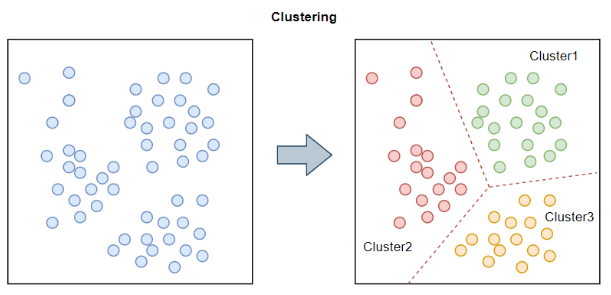

# **K-Means Clustering**

K-Means merupakan tipe clustering dengan centroid based (titik pusat). Artinya kesamaan dari objek/sampel dihitung dari seberapa dekat objek itu dengan centroid atau titik pusat.

Untuk menghitung kedekatan, digunakan perhitungan jarak antar 2 buah data atau jarak Minkowski. Berikut rumusnya:

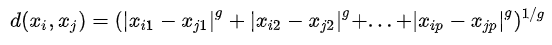

xi , xj adalah dua buah data yang akan dihitung jaraknya, dan p = dimensi/jumlah dari data

Terdapat beberapa tipe perhitungan jarak yang dapat digunakan, yaitu :
- Jarak Manhattan di mana g = 1
- Jarak Euclidean di mana g = 2
- Jarak Chebychev di mana g = ∞

Untuk menentukan centroid, pada awalnya kita perlu mendefinisikan jumlah centroid (K) yang diinginkan, semisalnya kita menetapkan jumlah K = 3; maka pada awal iterasi, algorithm akan secara random menentukan 3 centroid. Setelah itu, objek/sample/data point yang lain akan dikelompokkan sebagai anggota dari salah satu centroid yang terdekat, sehingga terbentuk 3 cluster data.

Iterasi selanjutnya, titik-titik centroid diupdate atau berpindah ke titik yang lain, dan jarak dari data point yang lain ke centroid yang baru dihitung kembali, kemudian dikelompokkan kembali berdasarkan jarak terdekat ke centroid yang baru. Iterasi akan terus berlanjut hingga diperoleh cluster dengan error terkecil, dan posisi centroid tidak lagi berubah

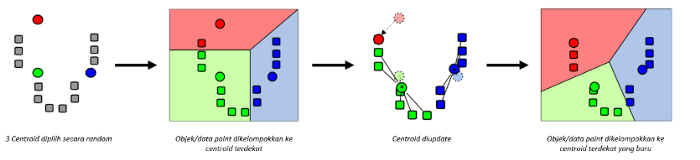

Secara prosedur, tahap eksplorasi data untuk memahami karakteristik data, dan tahap preprocessing tetap dilakukan. Tetapi dalam unsupervised learning, kita tidak membagi dataset ke feature dan label; dan juga ke dalam training dan test dataset, karena pada dasarnya kita tidak memiliki informasi mengenai label/target data

# **Tugas Praktek: Unsupervised Learning - Algoritm**

*Dataset ini merupakan data customer suatu mall dan berisi basic informasi customer berupa : CustomerID, age, gender, annual income, dan spending score. Adapun tujuan dari clustering adalah untuk memahami customer — customer mana saja yang sering melakukan transaksi sehingga informasi ini dapat diberikan kepada marketing team untuk membuat strategi promosi yang sesuai dengan karakteristik customer.*

1. Import pandas sebagai aliasnya dan KMeans dari sklearn.cluster.
2. Load dataset ‘https://storage.googleapis.com/dqlab-dataset/pythonTutorial/mall_customers.csv' dan beri nama dataset
3. Diasumsikan EDA dan preprocessing sudah dilakukan, selanjutnya kita memilih feature yang akan digunakan untuk membuat model yaitu `annual_income` dan `spending_score`. Assign dataset dengan feature yang sudah dipilih ke dalam ‘X’. 4. Pada dasarnya terdapat teknik khusus yang dilakukan untuk menyeleksi feature — feature (Feature Selection) mana saja yang dapat digunakan untuk machine learning modelling, karena tidak semua feature itu berguna. Beberapa feature justru bisa menyebabkan performansi model menurun. Tetapi untuk problem ini, secara default kita akan menggunakan `annual_income` dan `spending_score`.
4. Deklarasikan `KMeans( )` dengan nama cluster_model dan gunakan `n_cluster` = 5. `n_cluster` adalah argumen dari fungsi `KMeans( )` yang merupakan jumlah cluster/centroid (K). `random_state = 24`.
5. Gunakan fungsi `.fit_predict( )` dari `cluster_model` pada ‘X’ untuk proses clustering.


In [1]:
#import library
import pandas as pd  
from sklearn.cluster import KMeans

#load dataset
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/mall_customers.csv')

#selecting features  
X = dataset[['annual_income','spending_score']]  

#Define KMeans as cluster_model  
cluster_model = KMeans(n_clusters = 5, random_state = 24)  
labels = cluster_model.fit_predict(X)

# **Inspect & Visualizing the Cluster**

1. Pertama — tama, import `matplotlib.pyplot` dan beri inisial `plt`.
2. Gunakan fungsi `.values` untuk mengubah tipe ‘X’ dari dataframe menjadi array
3. Pisahkan X kedalam xs dan ys, di mana xs adalah Kolom index [0] dan ys adalah kolom index [1]
4. Buatlah scatter plot `plt.scatter()` dari xs dan ys, kemudian tambahkan `c = labels` untuk secara otomatis memberikan warna yang berbeda pada setiap cluster, dan `alpha = 0.5` ke dalam scatter plot argumen.
5. Hitunglah koordinat dari centroid menggunakan `.cluster_centers_` dari `cluster_model`, deklarasikan ke dalam variabel centroids.
6. Pisahkan centroids kedalam `centroids_x` dan `centroids_y`, di mana centroids_x adalah kolom index [0] dan centroids_y adalah kolom index [1]
7. Buatlah scatter plot dari `centroids_x` dan `centroids_y` , gunakan ‘D’ (diamond) sebagai marker parameter, dengan ukuran 50, s = 50

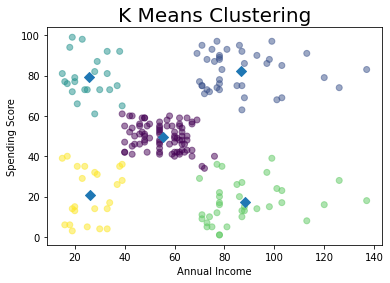

In [2]:
#import library
import matplotlib.pyplot as plt

#convert dataframe to array
X = X.values
#Separate X to xs and ys --> use for chart axis
xs = X[:,0]
ys = X[:,1]
# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs,ys,c=labels, alpha=0.5)

# Assign the cluster centers: centroids
centroids = cluster_model.cluster_centers_
# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x,centroids_y,marker='D', s=50)
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

## **Measuring Cluster Criteria**

Bagaimana kita tahu bahwa membagi segmentasi ke dalam jumlah cluster tertentu adalah segmentasi yang paling optimal?

Untuk mengukur kualitas dari clustering, kita bisa menggunakan inertia.

Inertia mengukur seberapa besar penyebaran object/data point data dalam satu cluster, semakin kecil nilai inertia maka semakin baik.

Kita tidak perlu bersusah payah menghitung nilai inertia karena secara otomatis, telah dihitung oleh KMeans( ) ketika algorithm di fit ke dataset.

Untuk mengecek nilai inertia cukup dengan print fungsi .inertia_ dari model yang sudah di fit ke dataset.

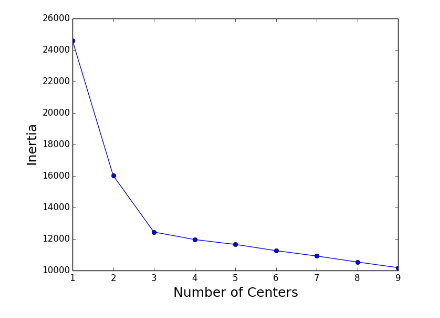

Adapun rule untuk memilih jumlah cluster yang optimal adalah dengan memilih jumlah cluster yang terletak pada “elbow” dalam intertia plot, yaitu ketika nilai inertia mulai menurun secara perlahan. Jika dilihat pada gambar maka jumlah cluster yang optimal adalah K = 3.

Untuk membuat inertia plot, silakan memanfaatkan fungsi looping (for):

1. Pertama — tama, buatlah sebuah list kosong yang dinamakan ‘inertia’. List ini akan kita gunakan untuk menyimpan nilai inertia dari setiap nilai K.
2. Gunakan for untuk membuat looping dengan range 1–10. Sebagai index looping gunakan k
3. Di dalam fungsi looping, deklarasikan `KMeans()` dengan nama `cluster_model` dan gunakan `n_cluster = k`, dan `random_state = 24`
4. Gunakan fungsi `.fit()` dari `cluster_model` pada ‘X’
5. Dari dari `cluster_model` yang sudah di-fit ke dataset, dapatkan nilai inertia menggunakan `inertia_` dan deklarasikan sebagai `inertia_value`
6. Append `inertia_value` ke dalam list ‘inertia’
7. Setelah iterasi/looping selesai plotlah list ‘inertia’ tadi sebagai ordinat-nya dan absica-nya adalah range(1, 10).

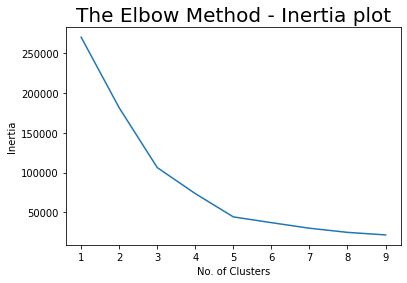

In [3]:
#import library
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#Elbow Method - Inertia plot
inertia = []
#looping the inertia calculation for each k
for k in range(1, 10):
    #Assign KMeans as cluster_model
    cluster_model = KMeans(n_clusters = k, random_state = 24)
    #Fit cluster_model to X
    cluster_model.fit(X)
    #Get the inertia value
    inertia_value = cluster_model.inertia_
    #Append the inertia_value to inertia list
    inertia.append(inertia_value)
    
##Inertia plot
plt.plot(range(1, 10), inertia)
plt.title('The Elbow Method - Inertia plot', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')
plt.show()